# Group Project: Group_24

In [1]:
#Load Necessary Packages for modelling.
library(tidyverse)
library(repr)
library(tidymodels)
library("readxl")
install.packages("expss")
library(expss)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## 1. Introduction

For our classification model, we have chosen information and a dataset that was taken by Murat Koklu and Ilker Ali Ozkan from the Faculty of Technology in Selcuk University, Turkey. Koklu and Ozkan (2020) used a high-resolution camera to take images of seven different types of dry beans in order to sort them and obtain a uniform seed classification. Creating this form of dry bean classification will decrease the need for manual labor when sorting out the beans and will help ascertain better quality dry beans. In Turkey, dry beans are sorted out using the shape, forms, types, and structures and so image-processing techniques are needed to help classify them. One example of this is when Kara et al. (2013) similarly used image-processing techniques to classify digital images of 12 different bean types using different features such as type, shape, form, etc. There were 13,611 images of grains from the seven different dry bean varieties with a total of sixteen features or attributes, twelve dimensions, and four shape forms obtained used to classify the beans. The seven varieties of beans include the Seker, Barbunya, Bombay, Cali, Horoz, Sira, and Dermason bean. However, in the goal of creating our classification model, we have elected to only use five of the attributes in the dataset instead of all sixteen of them: Area, Perimeter, Aspect Ratio, Roundness, and Compactness. All attributes are measured as pixel counts. With these five attributes, can we create a quality classification model that can accurately predict the dry bean varietal of new observations or new images of the seven registered varieties of dry bean? 

## 2. Methods
### 2.1 Importing Data

We use the following code to import our dataset from the web:

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
download.file(url, "data.zip")
unzip("data.zip")
beans_raw <- read_excel('./DryBeanDataset/Dry_Bean_Dataset.xlsx')
head(beans_raw)

Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
29380,624.110,212.8261,175.9311,1.209713,0.5627273,29690,193.4109,0.7781132,0.9895588,0.9478495,0.9087742,0.007243912,0.003047733,0.8258706,0.9990661,SEKER
30008,645.884,210.5580,182.5165,1.153638,0.4986160,30724,195.4671,0.7826813,0.9766957,0.9039364,0.9283288,0.007016729,0.003214562,0.8617944,0.9941988,SEKER
30140,620.134,201.8479,190.2793,1.060798,0.3336797,30417,195.8965,0.7730980,0.9908933,0.9848771,0.9705155,0.006697010,0.003664972,0.9419004,0.9991661,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER


### 2.2 Data Cleaning

Our raw data is already almost tidy. After confirming there are no missing values, all we need to do is change the type of the class varible from a character to a factor, clean up the varible names, and select only the varibles we will be using.

In [3]:
beans_raw %>%
  map(sum(is.na(.)))

beans_clean <- beans_raw %>%
                mutate(Class = as_factor(Class), Roundness = roundness, AspectRatio = AspectRation) %>%
                select(Class, Area, Perimeter, AspectRatio, Compactness, Roundness)
head(beans_clean)

$Area
NULL

$Perimeter
NULL

$MajorAxisLength
NULL

$MinorAxisLength
NULL

$AspectRation
NULL

$Eccentricity
NULL

$ConvexArea
NULL

$EquivDiameter
NULL

$Extent
NULL

$Solidity
NULL

$roundness
NULL

$Compactness
NULL

$ShapeFactor1
NULL

$ShapeFactor2
NULL

$ShapeFactor3
NULL

$ShapeFactor4
NULL

$Class
NULL

Class,Area,Perimeter,AspectRatio,Compactness,Roundness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEKER,28395,610.291,1.197191,0.9133578,0.9580271
SEKER,28734,638.018,1.097356,0.9538608,0.8870336
SEKER,29380,624.110,1.209713,0.9087742,0.9478495
SEKER,30008,645.884,1.153638,0.9283288,0.9039364
SEKER,30140,620.134,1.060798,0.9705155,0.9848771
SEKER,30279,634.927,1.171067,0.9237260,0.9438518


### 2.3 Spliting Data into Training and Testing Datasets

Before we proceed with exploratory data analysis, we need to split our data into testing and training data, with 75% of the data in the training set and 25% in the testing. For the following steps we will only use our training data, setting aside the testing data to use to test the validity and accuracy of our model later.

The number of training and testing datasets depends on the first the total number of datasets, second the best calibration need to do. Our dataset is over 13000 lines, therefore, 75% training set split guarantees that the classification model has enough data to train while at the same time leaves enough testing data to verify the effectiveness of the model.

In [4]:
#random seed to ensure that the same split is done each time
set.seed(1234)

beans_split <- initial_split(beans_clean, prop=0.75, strata = Class)
beans_train <- training(beans_split)
beans_test <- testing(beans_split)

### 2.4 Exploratory Data Analysis

We now create some preliminary figures to explore the characteristics of our dataset. The table created below presents summary statistics about the predictor varibles, inculding minimum, maximum, mean and median values as well as the standard deviation for our five predictor varibles. 

In [5]:
summary_data <- beans_train %>%
                select(Area:Roundness) %>%
                apply_labels(Area = "Area",
                            Perimeter = "Perimeter",
                            AspectRatio = "Aspect Ratio",
                            Compactness = "Compactness",
                            Roundness = "Roundness")
                             
summary_table <- summary_data %>%
                 tab_cells(Area, Perimeter, AspectRatio, Compactness, Roundness) %>%
                 tab_cols(total(label = "Summary Statistics")) %>% 
                 tab_stat_fun(Max = w_max, Min = w_min, Mean = w_mean, "Median" = w_median, "Standand Deviation " = w_sd, method = list) %>%
                 tab_pivot()
summary_table

|              | Summary Statistics |         |         |         |                     |
 |              |                Max |     Min |    Mean |  Median | Standand Deviation  |
 | ------------ | ------------------ | ------- | ------- | ------- | ------------------- |
 |         Area |           254616.0 | 20420.0 | 52951.8 | 44675.0 |             29148.4 |
 |    Perimeter |             1985.4 |   524.7 |   854.6 |   794.9 |               213.3 |
 | Aspect Ratio |                2.4 |     1.0 |     1.6 |     1.6 |                 0.2 |
 |  Compactness |                1.0 |     0.6 |     0.8 |     0.8 |                 0.1 |
 |    Roundness |                1.0 |     0.5 |     0.9 |     0.9 |                 0.1 |

We also plot the estimated probability density functions of our predictor varibles to see how their distributions vary between the different classes. Before we do this we will center and scale the predictors so that we can make easier comparisions between the different predictors.

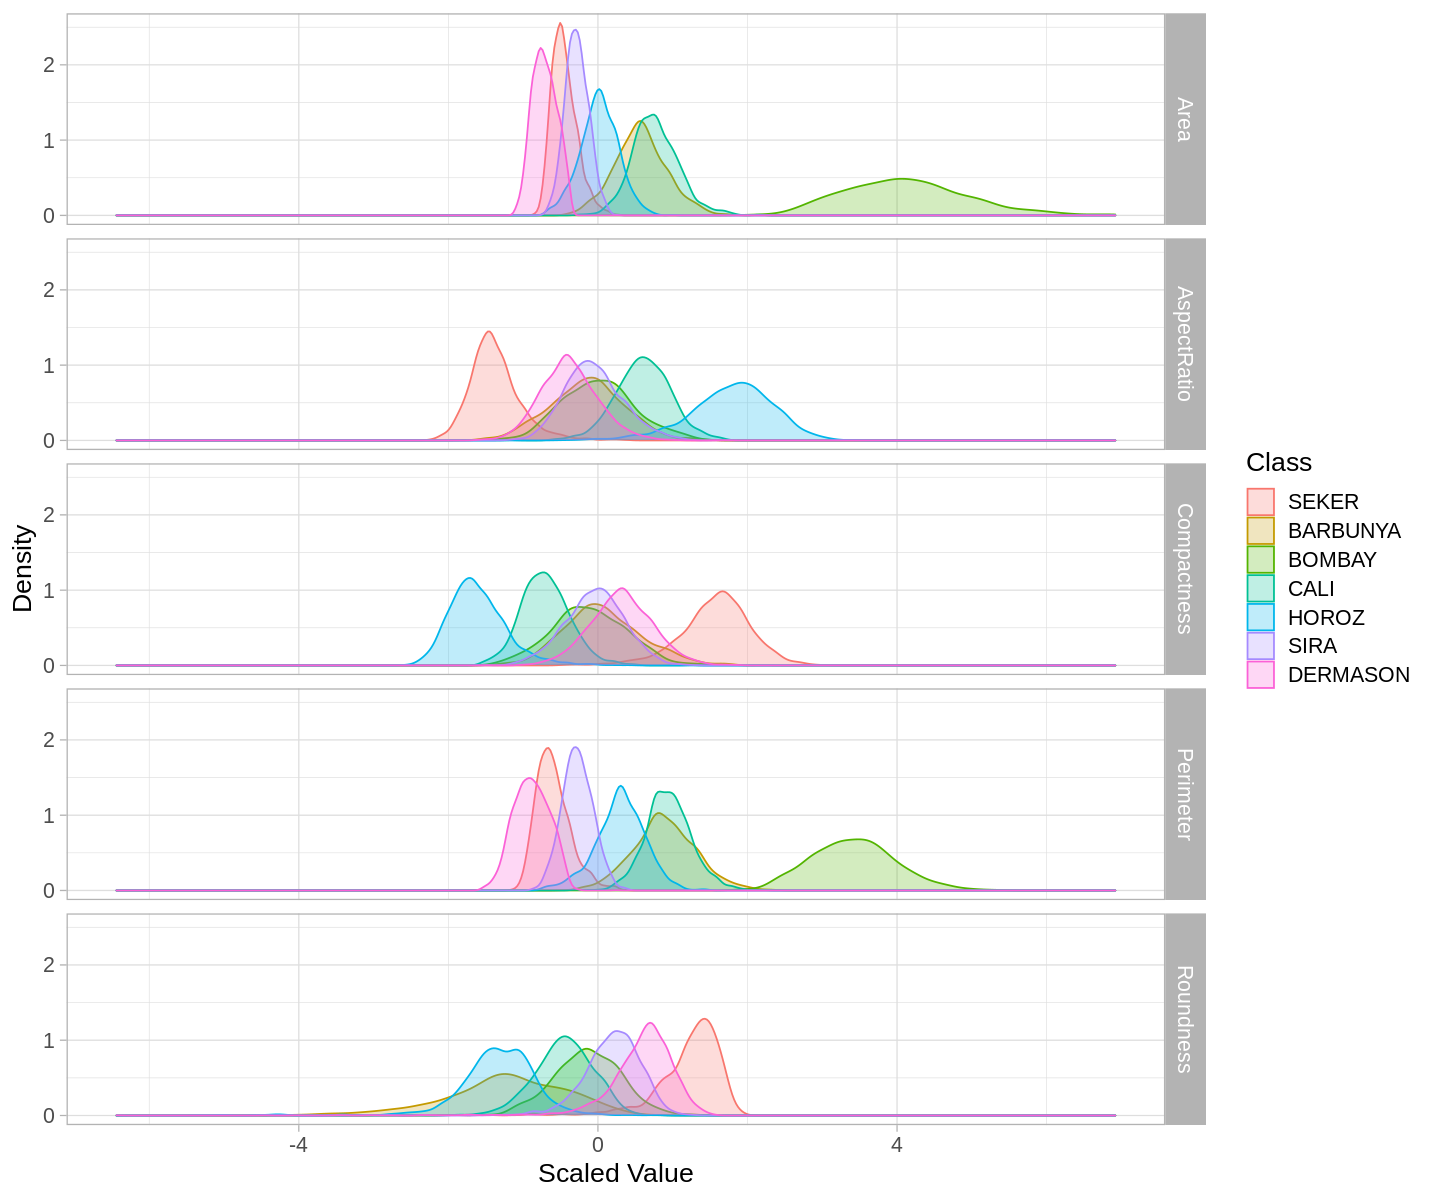

In [43]:
#center and scale all the predictor varibles to allow comparisons across metrics 
scaling_recipe <- recipe(Class ~ ., data = beans_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()

scaled_beans <- bake(scaling_recipe, beans_train)

#reshape data for visulization
expor_plot_data <- scaled_beans %>%
                    pivot_longer(cols = Area:Roundness,
                                 names_to = "predictor",
                                 values_to = "value")

#create density plot
options(repr.plot.width=12, repr.plot.height=10)

expor_plot <- ggplot(expor_plot_data,aes(x=value, fill=Class, colour = Class)) + 
                facet_grid(rows = ggplot2::vars(predictor))+
                geom_density(alpha=0.25)+
                labs(x = "Scaled Value",
                     y = "Density")+
                theme_light(base_size = 16)
expor_plot

### 2.5 Training the Classifier Cross-Validation

In the following step we establish our classification model using tidymodels and tune the model to select the optimal value for the parameter k (the number of neighboors considered in the class vote). We test a range of k values between 1 and 50. To evaluate the accuracy of each specification, we use cross validation with 5 folds. We chose to use only 5 folds as increasing the number of folds decreases the speed of computation and with the large range of k values tested and the size of the dataset, computation time becomes untenable when a larger number of folds are used. Using 5 folds allows us to execute the tuning in a reasonable amount of time while still provding a suffcient estimate of accuracy. 

In [13]:
vfold <- vfold_cv(beans_train, v = 5, strata = Class)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_results <- workflow() %>%
  add_recipe(scaling_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")

We plot the accuracy of different parameritizations of the model below.

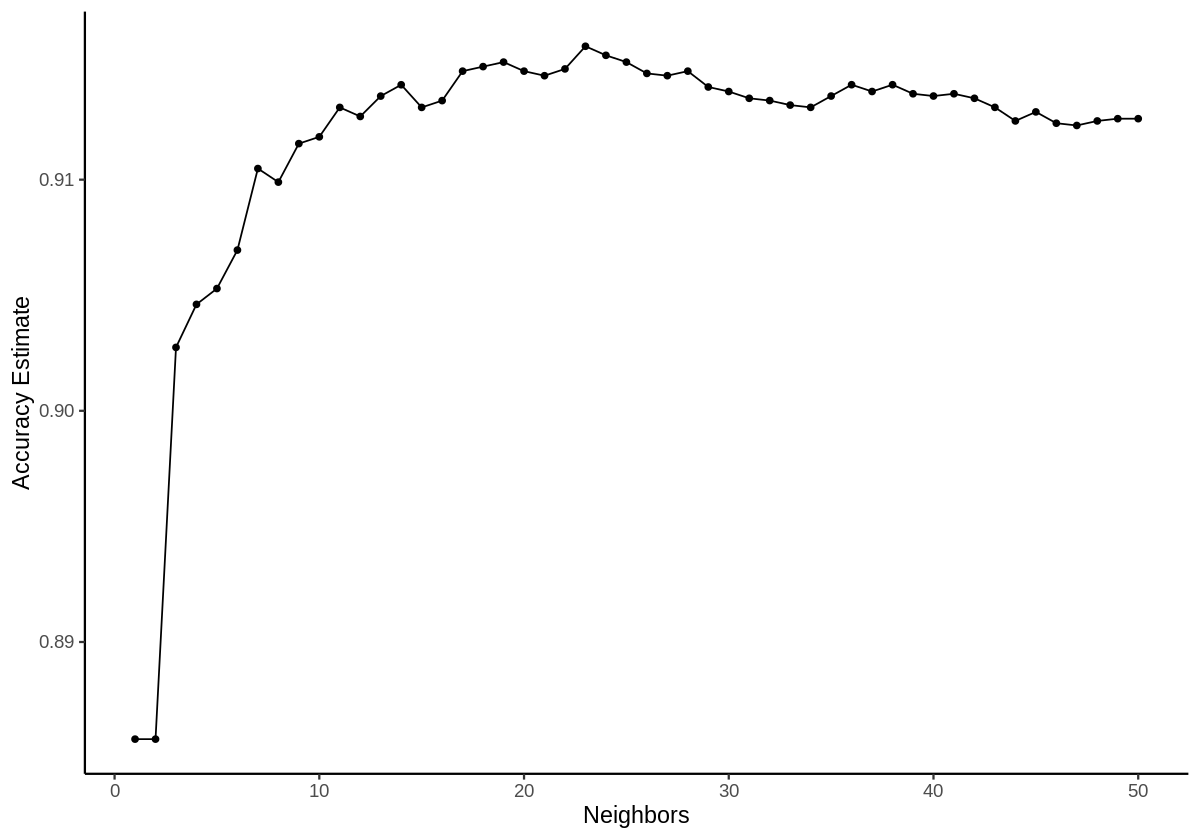

In [47]:
options(repr.plot.width=10, repr.plot.height=7)

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  theme_classic(base_size = 14)

accuracy_vs_k

Visually we can see that the accuracy of the model peaks around k = 23. We extract the number of neighboors associated with the optimal accuracy estimate and save that value as kmax.

In [15]:
kmax <- accuracies %>%
  filter(mean == max(mean))%>%
  pull(neighbors)

kmax

[1] 23

### 2.6 Final Predictions

Next, we retrain our model using our training data and kmax as the number of nearest neighboors. Then we pass our testing data though the finalized model. 

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmax) %>%
            set_engine("kknn") %>%
            set_mode("classification")

beans_fit <- workflow() %>%
  add_recipe(scaling_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = beans_train)

beans_predictions <- beans_fit %>%
  predict(beans_test) %>%
  bind_cols(beans_test) 

head(beans_predictions)

.pred_class,Class,Area,Perimeter,AspectRatio,Compactness,Roundness
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEKER,SEKER,30008,645.884,1.153638,0.9283288,0.9039364
SEKER,SEKER,31178,636.888,1.141582,0.9355105,0.9658996
SEKER,SEKER,31203,639.782,1.163315,0.9267828,0.9579485
SEKER,SEKER,31272,638.666,1.132851,0.9392377,0.9634250
SEKER,SEKER,31335,635.011,1.177161,0.9213624,0.9765108
SEKER,SEKER,31682,646.721,1.092574,0.9561975,0.9518939


## 3. Results

We can compare our predictions of the test data to the actual classes to calculate the overall accuracy of our predictions. We achive a final accuracy rate of 92%.

In [63]:
beans_summary <- beans_predictions %>%
                  metrics(truth = Class, estimate = .pred_class) %>%
                  filter(.metric == "accuracy")

beans_accuracy <- beans_summary %>%
                select(.estimate) %>%
                pull()

paste(round(beans_accuracy*100,2), "%")

[1] "91.88 %"

We also present accuracy rates by Class. Here we can see that our model is very good at classifying the Bombay type beans, with a 100% accuracy rate. It is the worst at predicting the Barbunya and Sira type beans, with only 87% accuracy for those vareity.

`summarise()` ungrouping output (override with `.groups` argument)



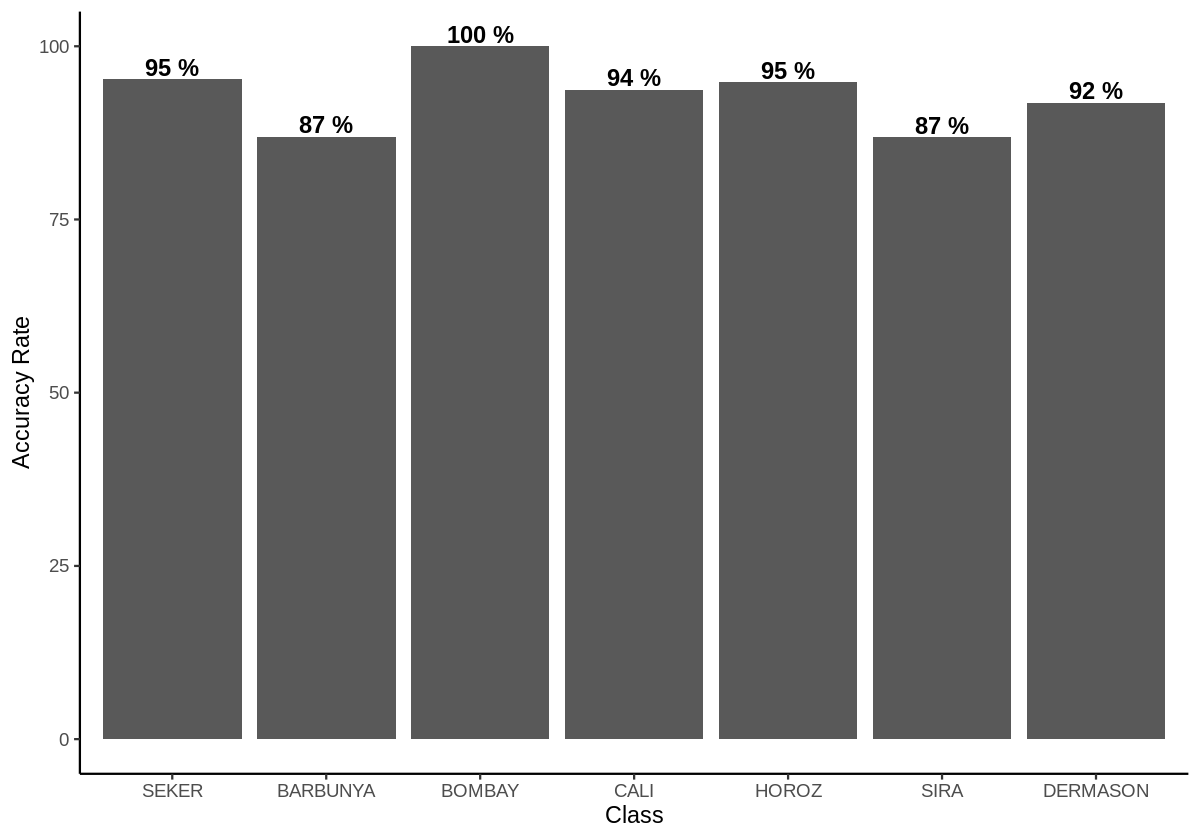

In [58]:
accurate_test <- function(class, prediction) {
   if (class == prediction) {1}
    else {0}
}

class_acc <- beans_fit %>%
  predict(beans_test) %>%
  bind_cols(beans_test)%>%
  rowwise()%>%
  mutate(acc = accurate_test(Class, .pred_class)) 

class_acc_stats <- class_acc %>%
                    group_by(Class)%>%
                    summarize(n = n(),
                              acc_count = sum(acc))%>%
                    mutate(percent_acc = (acc_count/n)*100)

class_acc_plot <- ggplot(class_acc_stats, aes(y = percent_acc, x = Class))+
                    geom_bar(stat = "identity")+
                    geom_text(aes(label = paste(round(percent_acc),"%"), fontface=2), vjust = -0.2, size = 5)+
                    labs(x = "Class",
                         y = "Accuracy Rate")+
                    theme_classic(base_size = 14)

class_acc_plot

To see even more specifically where our errors are occuring we can create a confusion matrix. The confusion matrix presents a table of the predicted class lables against the true classes. This shows us that our most common errors are misclassifying Sira as Dermason, Dermason as Sira, and Barbunya as Cali.

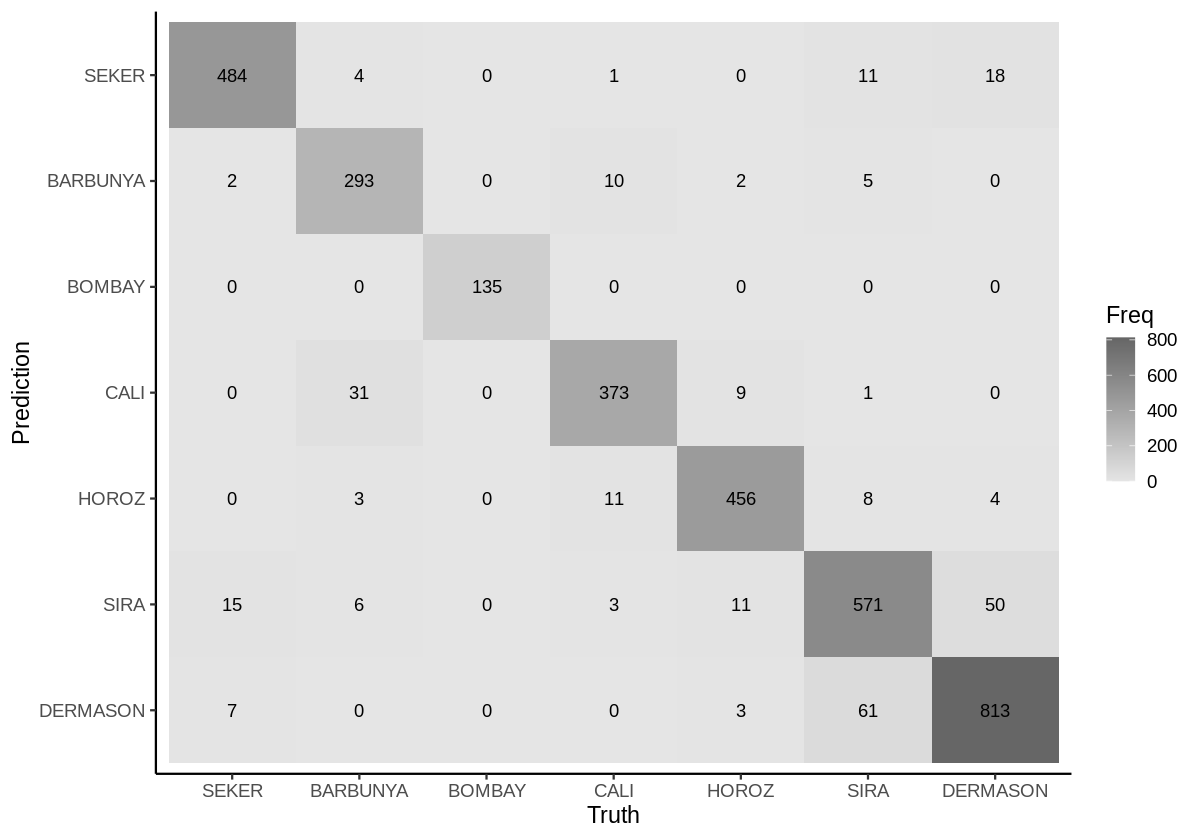

In [81]:
library(broom)

confusion <- beans_predictions %>%
             conf_mat(truth = Class, estimate = .pred_class)

autoplot(confusion, type = "heatmap")+
    theme_classic(base_size = 14)

## 4. Further Discussion

After creating, tuning, and evaluating our classification model to sort out the seven registered dry bean varieties, we have found that our model has obtained a 92% accuracy rate. Based on our classification task, this accuracy rate is high enough when it comes to sorting out the seven dry bean types. The majority of the 8%  error in our classification model however is when it tries to classify the Barbunya and Sira dry bean varieties. In future iterations of our classification model we would have to find a way to re-tune our model so that our accuracy rates for those two particular classes are improved. A surprising statistic we found in the results is the fact that our classification model was able to achieve a 100% accuracy rate for one of the dry bean classes, namely the Bombay dry bean. Our group did not expect to get a full accuracy rate for any of our seven particular classes of dry beans. Another part of our data we did not expect to see during our exploratory data analysis was when plotting the estimated probability density functions of our predictor variables. It seems that the Bombay bean visually has significantly higher Area and Perimeter values but lower density values than the other classes of dry beans. 

We hope that our findings and our final classification model can help inspire other agricultural communities and countries to adopt and incorporate this method into some sort of image-processing or artificial intelligence (AI) technology. This type of machine learning is a form of artificial intelligence (AI) that teaches computers to think in a human-like way: to learn and improve on past experiences. It works by exploring data and recognizing patterns, and involves minimal human intervention. This technology would help in quickly and accurately sorting out, categorizing, and screening different agricultural crops or products. This would greatly benefit the sorting of dry beans or similar types of products such as seeds or nuts by decreasing the need for difficult manual labor and to improve the quality of current agricultural sorting and classification methods. Questions from our project findings that can inspire future study in terms of agriculture includes how much we can expand a similar classification model as we have created to classify a much wider range of varieties. For example, can there be a classification model created that can accurately classify the 7,500 varieties of apples by using different features such as color, shape or diameter that exist versus just the 7 registered varieties of dry beans in this project?

Additionally, according to Koklu, M., and I. A. Ozkan(2020)'s research, the machine learning technique based on two-dimensional images, therefore the differences in the shape of each bean variety could be used as a separate variable. "If the coefficient of variance is also included in the shape and size variables of each cultivar, the classification success of bean cultivars may increase." Beside shape and size features, the texture features and statistical features can improve the classification results.

Overall, innovating and further developing upon these classification models and combining it with technology will greatly propel and improve upon current agricultural sorting methods. 

## 5. References

Kara, M., Sayıncı,B., Elkoca, E., Öztürk,İ., Özmen, T.B., 2013. Seed size and shapeanalysis of registered common bean (Phaseolus vulgaris L.) cultivars in Turkey usingdigital photography. Tarım Bilim. Derg. 19, 219–234.https://doi.org/10.1501/Tarimbil_0000001247.Kılıc

KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507